## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:

len(mouse_study_df)

1893

In [3]:
# Checking the number of mice.
original_mouse_count = len(mouse_study_df["Mouse ID"].unique())
original_mouse_count


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_df = mouse_study_df.loc[mouse_study_df.duplicated(["Mouse ID","Timepoint"]), :]
duplicated_mouse_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

duplicated_id = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
clean_data_df = mouse_study_df[~mouse_study_df['Mouse ID'].isin(duplicated_id)]
len(clean_data_df)


1880

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_data_df["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mouse_study_mean = clean_data_df.groupby(["Mouse ID", "Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mouse_study_median = clean_data_df.groupby(["Mouse ID", "Drug Regimen"]).median()["Tumor Volume (mm3)"]
mouse_study_var = clean_data_df.groupby(["Mouse ID", "Drug Regimen"]).var()["Tumor Volume (mm3)"]
mouse_study_std = clean_data_df.groupby(["Mouse ID", "Drug Regimen"]).std()["Tumor Volume (mm3)"]
mouse_study_sem = clean_data_df.groupby(["Mouse ID", "Drug Regimen"]).sem()["Tumor Volume (mm3)"]

clean_data_stat_df = pd.DataFrame({"Mean" : mouse_study_mean,
                                    "Median": mouse_study_median,
                                    "Variance" : mouse_study_var,
                                    "Standard Deviation": mouse_study_std,
                                    "SEM": mouse_study_sem})
clean_data_stat_df.head()

,,Mean,Median,Variance,Standard Deviation,SEM
Mouse ID,Drug Regimen,,,,,
a203,Infubinol,56.312708,55.983272,50.407041,7.099792,2.245151
a251,Infubinol,55.237095,55.938620,51.740730,7.193103,2.274659
a262,Placebo,58.611631,58.572588,84.759928,9.206515,2.911356
a275,Ceftamin,52.770965,52.044750,36.322924,6.026850,1.905857
a366,Stelasyn,54.639906,55.265582,38.415384,6.198015,2.342629


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
clean_data_df.groupby(["Mouse ID","Drug Regimen"]).agg(
        mouse_study_mean = pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="mean"),
        mouse_study_median = pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="median"),
        mouse_study_var = pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="var"),
        mouse_study_std = pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="std"),
        mouse_study_sem = pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="sem"))

clean_data_stat_df = pd.DataFrame({"Mean" : mouse_study_mean,
                                    "Median": mouse_study_median,
                                    "Variance" : mouse_study_var,
                                    "Standard Deviation": mouse_study_std,
                                    "SEM": mouse_study_sem})
clean_data_stat_df.head()


,,Mean,Median,Variance,Standard Deviation,SEM
Mouse ID,Drug Regimen,,,,,
a203,Infubinol,56.312708,55.983272,50.407041,7.099792,2.245151
a251,Infubinol,55.237095,55.938620,51.740730,7.193103,2.274659
a262,Placebo,58.611631,58.572588,84.759928,9.206515,2.911356
a275,Ceftamin,52.770965,52.044750,36.322924,6.026850,1.905857
a366,Stelasyn,54.639906,55.265582,38.415384,6.198015,2.342629


In [9]:

# Regiments
regimen_names = clean_data_df["Drug Regimen"].unique()
regimen_names


array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Bar and Pie Charts

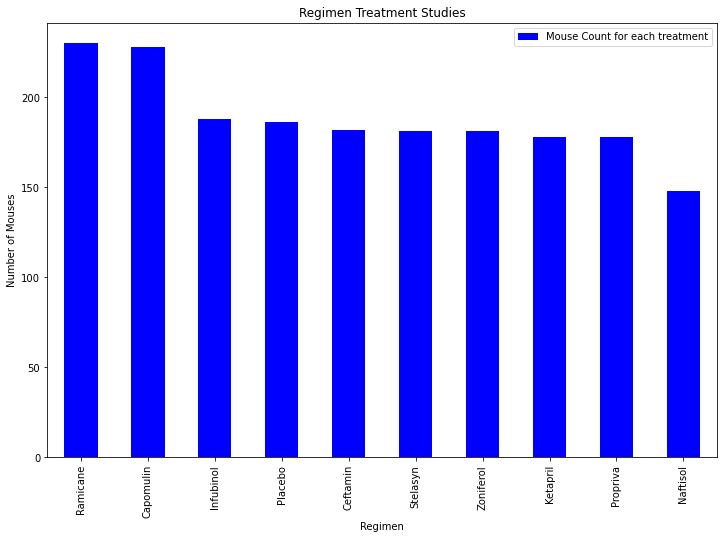

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Create an array that contains the number of users each language has

mouse_counts = clean_data_df["Drug Regimen"].value_counts()
regimen_names = clean_data_df["Drug Regimen"].unique()

mouse_study_chart = pd.DataFrame({"Drug Regimen": regimen_names,
                        "Mouse Count for each treatment" : mouse_counts} )
     
mouse_study_chart = mouse_study_chart.set_index("Drug Regimen")
mouse_study_chart.plot(kind = "bar", figsize = [12,8], 
        title = "Regimen Treatment Studies", legend = True,
        xlabel = "Regimen", ylabel = "Number of Mouses", color='b');

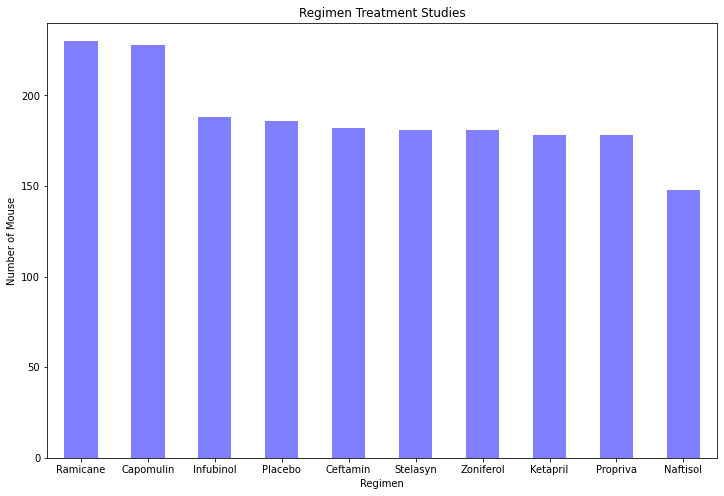

In [11]:
# # Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.rcParams["figure.figsize"] = (12,8)
plt.title("Regimen Treatment Studies")
plt.xlabel("Regimen")
plt.ylabel("Number of Mouse")
plt.xlim(-0.50, len(regimen_names)-0.5)
plt.ylim(0, max(mouse_counts)+10)
plt.bar(regimen_names, mouse_counts, width = 0.5, 
            color='b', alpha=0.5, align="center");

Male      958
Female    922
Name: Sex, dtype: int64


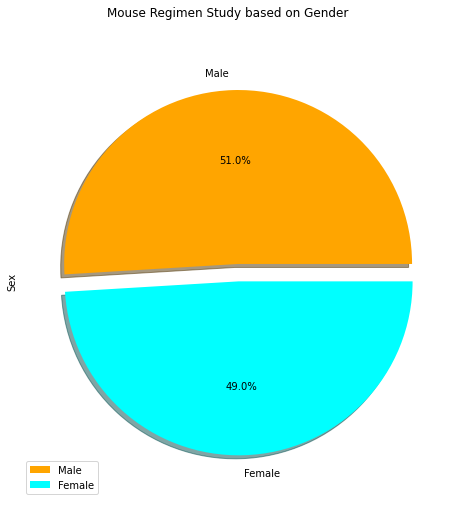

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_counts = clean_data_df["Sex"].value_counts()
labels = ['Male ', 'Female']
colors = [ "orange", "cyan"]
explodes = (0.1, 0)

mouse_study_chart = pd.DataFrame(data = gender_counts)     
print(gender_counts)

mouse_study_chart.plot(kind = "pie", figsize = [12,8],
       subplots=True, shadow = True,
       labels = labels, startangle = 0, colors = colors,
       title = "Mouse Regimen Study based on Gender", 
       explode = explodes, autopct="%1.1f%%", );


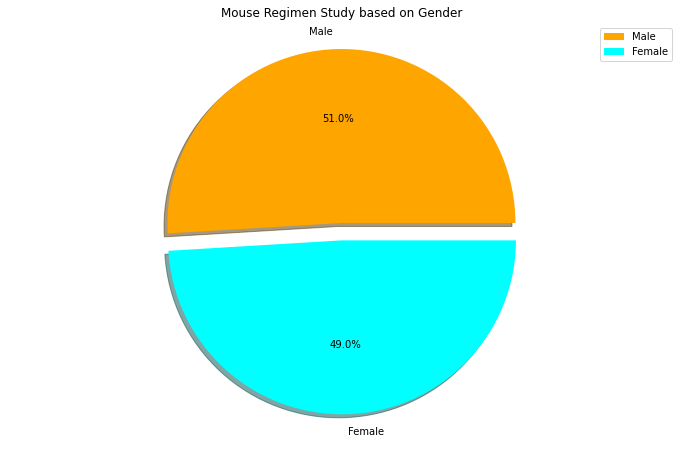

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = gender_counts

# plt.legend(sizes ,labels, loc="lower right")
plt.axis('equal');

plt.title("Mouse Regimen Study based on Gender")
plt.pie(sizes, explode=explodes, \
        labels=labels, colors = colors, \
        autopct="%1.1f%%", shadow=True, startangle=0);
plt.legend(labels, loc="best")

plt.show();

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimen_df = clean_data_df.loc[clean_data_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]),
                                         ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]                        

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint_df = selected_regimen_df.groupby(["Drug Regimen", "Mouse ID"]).max()["Timepoint"]
final_timepoint_df = final_timepoint_df.to_frame()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
selected_merge_df = pd.merge(final_timepoint_df, clean_data_df, on=("Mouse ID", "Timepoint"), how="left")
selected_merge_df.head(100)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,s508,45,Ramicane,Male,1,17,30.276232,0
96,u196,45,Ramicane,Male,18,25,40.667713,3
97,w678,5,Ramicane,Female,5,24,43.166373,0
98,y449,15,Ramicane,Male,19,24,44.183451,0


In [17]:
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_volumes = []

# Put treatments into a list for for loop (and later for plot labels)
for treatment in treatment_list:

    # Create empty list to fill with tumor vol data (for plotting)
    selected_tumor_volume = selected_merge_df.loc[selected_merge_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)" ]
    treatment_volumes.append(selected_tumor_volume)

    quartiles = selected_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print("Treatment: " + treatment + " =================================")
    print(f"The lower quartile of tumor volumes is: {lowerq}")
    print(f"The upper quartile of tumor volumes is: {upperq}")
    print(f"The interquartile range of tumor volumes is: {iqr}")
    print(f"The median of tumor volumes is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
        

Treatment: Capomulin =================================
The lower quartile of tumor volumes is: 32.37735684
The upper quartile of tumor volumes is: 40.1592203
The interquartile range of tumor volumes is: 7.781863460000004
The median of tumor volumes is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Treatment: Ramicane =================================
The lower quartile of tumor volumes is: 31.56046955
The upper quartile of tumor volumes is: 40.65900627
The interquartile range of tumor volumes is: 9.098536719999998
The median of tumor volumes is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Treatment: Infubinol =================================
The lower quartile of tumor volumes is: 54.04860769
The upper quartile of tumor volumes is: 65.52574285
The interquartile range of tumor volumes is: 11.477135160000003
The median of tumor volumes is: 60.16518046 
Values below

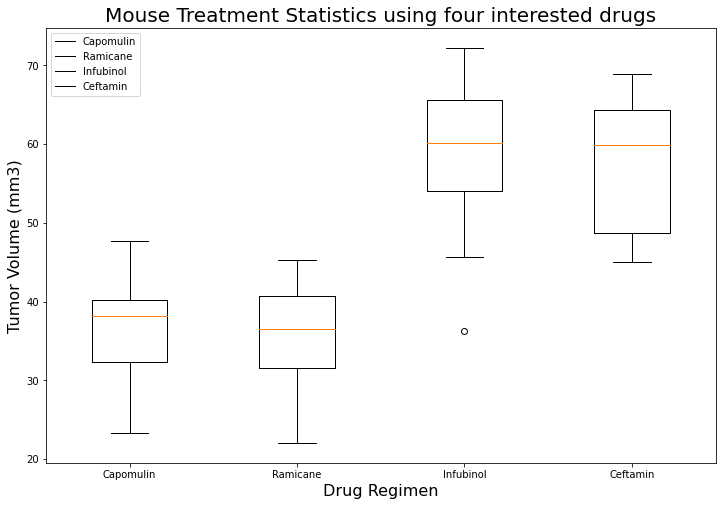

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
capomulins = selected_merge_df.loc[selected_merge_df["Drug Regimen"]=="Capomulin", "Tumor Volume (mm3)"]
ramicanes = selected_merge_df.loc[selected_merge_df["Drug Regimen"]=="Ramicane", "Tumor Volume (mm3)"]
infubinols = selected_merge_df.loc[selected_merge_df["Drug Regimen"]=="Infubinol", "Tumor Volume (mm3)"]
ceftamins = selected_merge_df.loc[selected_merge_df["Drug Regimen"]=="Ceftamin", "Tumor Volume (mm3)"]
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title("Mouse Treatment Statistics using four interested drugs", fontsize = 20)
ax1.set_xlabel("Drug Regimen", fontsize = 16)
ax1.set_ylabel("Tumor Volume (mm3)", fontsize = 16)

ax1.boxplot([capomulins, ramicanes, infubinols, ceftamins], labels=labels)
ax1.legend(labels, loc="best")
plt.show()

## Line and Scatter Plots

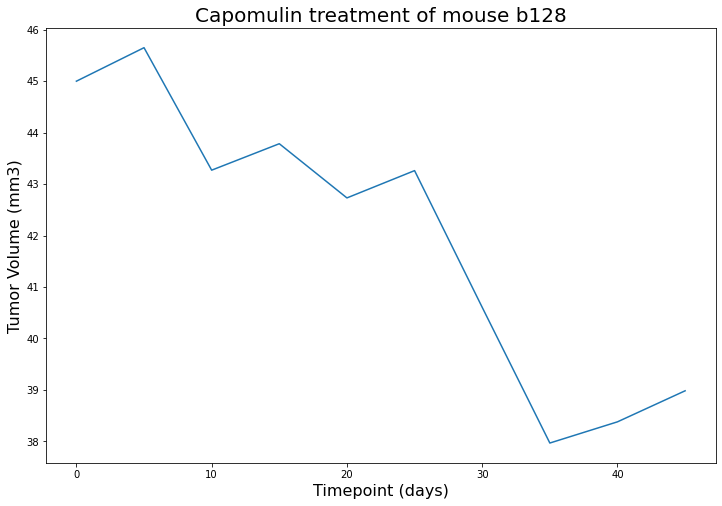

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_data_df[clean_data_df["Drug Regimen"]=="Capomulin"]
mouse_tumor_volumes = capomulin_df.loc[clean_data_df["Mouse ID"]=='b128', "Tumor Volume (mm3)"]
mouse_timepoints = capomulin_df.loc[clean_data_df["Mouse ID"]=='b128', "Timepoint"]
plt.plot(mouse_timepoints, mouse_tumor_volumes)
plt.xlabel('Timepoint (days)', fontsize = 16)
plt.ylabel('Tumor Volume (mm3)', fontsize = 16)
plt.title('Capomulin treatment of mouse b128', fontsize = 20)
plt.show()

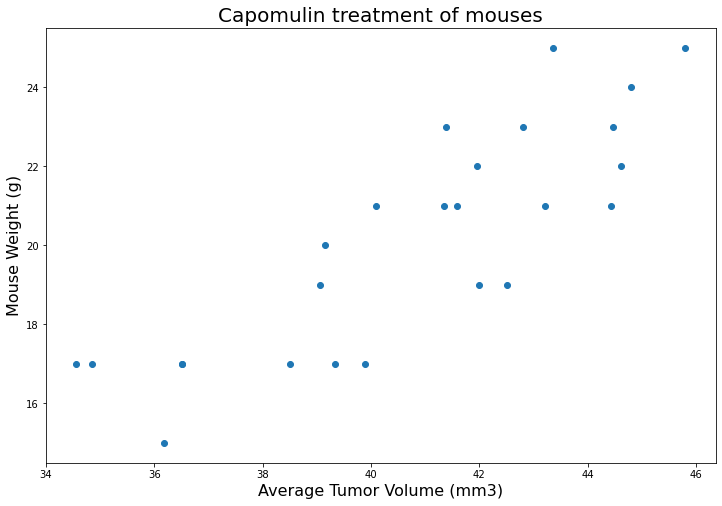

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_tumor_means = capomulin_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
capomulin_weights = capomulin_df.groupby("Mouse ID").max()["Weight (g)"]
plt.xlabel('Average Tumor Volume (mm3)', fontsize = 16)
plt.ylabel('Mouse Weight (g)', fontsize = 16)
plt.title('Capomulin treatment of mouses', fontsize = 20)
plt.scatter(capomulin_tumor_means, capomulin_weights)
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_tumor_means,capomulin_weights)
print(f"The correlation between mouse weight and average tumor volume factors is {round(correlation[0],2)}")


The correlation between mouse weight and average tumor volume factors is 0.84


The correlation between both factors is 0.84


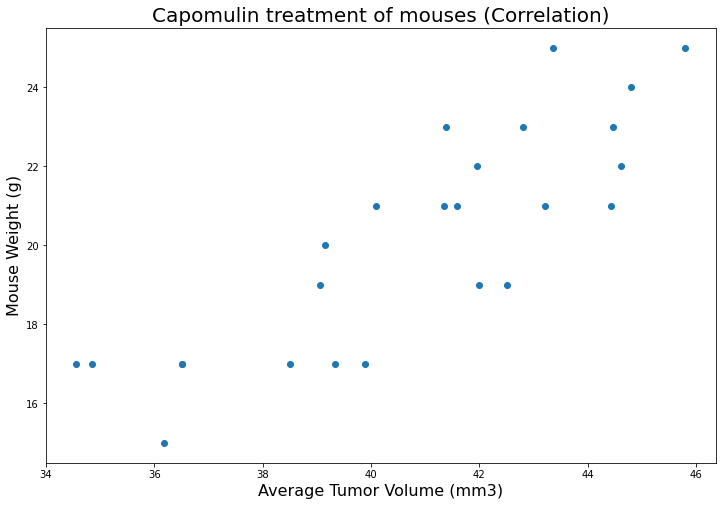

In [22]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(capomulin_tumor_means,capomulin_weights)
plt.xlabel('Average Tumor Volume (mm3)', fontsize = 16)
plt.ylabel('Mouse Weight (g)', fontsize = 16)
plt.title('Capomulin treatment of mouses (Correlation)', fontsize = 20)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.7088568047708723
We have positive regression


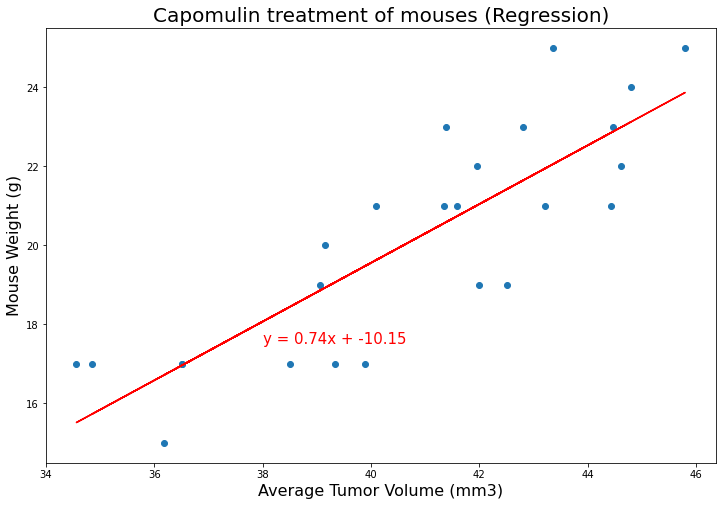

In [23]:
# Print out the r-squared value along with the plot.
x_values = capomulin_tumor_means
y_values = capomulin_weights
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")      

plt.annotate(line_eq,(38,17.5),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume (mm3)', fontsize = 16)
plt.ylabel('Mouse Weight (g)', fontsize = 16)
plt.title('Capomulin treatment of mouses (Regression)', fontsize = 20)
print(f"The r-squared is: {rvalue**2}")
print("We have positive regression")
plt.show()

In [25]:
# Export final timepoints for all treatments for data analysis
temp_df = clean_data_df.loc[clean_data_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]),
                                         ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]                        

# Start by getting the last (greatest) timepoint for each mouse
temp_timepoint_df = clean_data_df.groupby(["Drug Regimen", "Mouse ID"]).max()["Timepoint"]
temp_timepoint_df = temp_timepoint_df.to_frame()

In [26]:

temp_merge_df = pd.merge(temp_timepoint_df, clean_data_df, on=("Mouse ID", "Timepoint"), how="left")
filepath = 'treatment_final_timepoints.csv'  
temp_merge_df.to_csv(filepath)  